In [5]:
# Importing modules
import pandas as pd
import os

In [6]:
# Read data into papers
reviews = pd.read_excel('/Users/vidydya/Desktop/ESE Previous Blocks/MSC Text Analytics/Assignment 1/reviews_final4.xlsx')
reviews.head()

,app_id,author,rating,posted_at,body,helpful_count,Categories,App title,App developer name,Overall app rating,App review count,Pricing trial,Pricing Plan Price
0,b1da53a4-0474-4700-9620-bf386bc033fb,Consuela,5,"August 6, 2020",Great and super fast customer service! Highly ...,0,Store design,Instant Search +,"Fast Simon, Inc.",4.9,626,30-day free trial,Free
1,b1da53a4-0474-4700-9620-bf386bc033fb,L'Atelier Global,5,"August 4, 2020","Still setting up my store, and after initially...",0,Store design,Instant Search +,"Fast Simon, Inc.",4.9,626,30-day free trial,Free
2,b1da53a4-0474-4700-9620-bf386bc033fb,city'super E-Shop,5,"August 4, 2020","This is an excellent search app, which they ha...",0,Store design,Instant Search +,"Fast Simon, Inc.",4.9,626,30-day free trial,Free
3,b1da53a4-0474-4700-9620-bf386bc033fb,PortableHandwashing.com,5,"July 30, 2020","A+, great great great customer service! thanks...",0,Store design,Instant Search +,"Fast Simon, Inc.",4.9,626,30-day free trial,Free
4,b1da53a4-0474-4700-9620-bf386bc033fb,ICCTUNING,5,"July 28, 2020","I'm begginig to use this app, the search engin...",0,Store design,Instant Search +,"Fast Simon, Inc.",4.9,626,30-day free trial,Free


In [7]:
# Load the regular expression library
import re
# Remove punctuation
reviews['body_processed'] = \
reviews['body'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
reviews['body_processed'] = \
reviews['body_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
reviews['body_processed'].head()

0    great and super fast customer service highly c...
1    still setting up my store and after initially ...
2    this is an excellent search app which they hav...
3    a+ great great great customer service thanks t...
4    i'm begginig to use this app the search engine...
Name: body_processed, dtype: object

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud


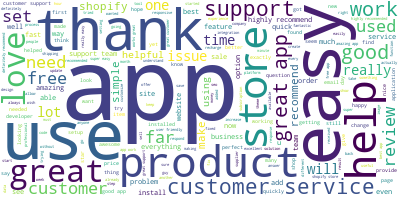

In [9]:
# Join the different processed titles together.
long_string = ','.join(list(reviews['body_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='green')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [10]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['app', 'store', 'shopify'])


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vidydya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = reviews.body_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['great', 'super', 'fast', 'customer', 'service', 'highly', 'customizable', 'good', 'easy', 'decipher', 'analytics']


In [13]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [14]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.043*"great" + 0.016*"support" + 0.016*"customer" + 0.013*"easy" + '
  '0.012*"love" + 0.012*"service" + 0.011*"team" + 0.010*"recommend" + '
  '0.010*"thank" + 0.009*"really"'),
 (1,
  '0.018*"customer" + 0.014*"support" + 0.013*"great" + 0.012*"help" + '
  '0.009*"use" + 0.009*"service" + 0.007*"recommend" + 0.007*"thank" + '
  '0.007*"amazing" + 0.006*"one"'),
 (2,
  '0.014*"use" + 0.012*"easy" + 0.012*"best" + 0.011*"using" + 0.011*"good" + '
  '0.010*"far" + 0.009*"support" + 0.008*"great" + 0.007*"recommend" + '
  '0.007*"free"'),
 (3,
  '0.024*"easy" + 0.013*"great" + 0.012*"really" + 0.012*"customer" + '
  '0.011*"use" + 0.011*"support" + 0.010*"love" + 0.009*"like" + '
  '0.009*"thanks" + 0.009*"customers"'),
 (4,
  '0.017*"use" + 0.017*"easy" + 0.015*"great" + 0.014*"support" + '
  '0.011*"recommend" + 0.010*"good" + 0.008*"used" + 0.008*"help" + '
  '0.007*"time" + 0.007*"customers"'),
 (5,
  '0.019*"recommend" + 0.015*"great" + 0.010*"good" + 0.010*"really" + '
  '

In [23]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
pyLDAvis.enable_notebook()


In [25]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.034108 -0.010899       1        1  12.568404
8     -0.024919  0.043524       2        1  11.503121
9      0.022395 -0.021890       3        1  10.820407
7      0.010665  0.006630       4        1  10.787578
1      0.006020  0.002607       5        1  10.739017
3      0.015406 -0.001209       6        1   9.814866
6      0.012599  0.016289       7        1   9.683567
5     -0.001438 -0.006393       8        1   8.945649
4     -0.022528  0.005549       9        1   8.189981
2     -0.052309 -0.034207      10        1   6.947411, topic_info=          Term         Freq        Total Category  logprob  loglift
6         good  2535.000000  2535.000000  Default  30.0000  30.0000
7        great  4221.000000  4221.000000  Default  29.0000  29.0000
4         easy  4020.000000  4020.000000  Default  28.0000  28.0000
59   recommend  2052.000000  2052.000000  Default  27.0000  27.0000
68    products  1464.000000  1464.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
80       would    77.060422  1350.317683  Topic10  -5.3604  -0.1967
74        work    70.543624  1025.705872  Topic10  -5.4488  -0.0101
392       love    76.195763  1444.859467  Topic10  -5.3717  -0.2757
343       even    61.643945   656.877814  Topic10  -5.5836   0.3007
89         set    62.963554  1087.378421  Topic10  -5.5624  -0.1822

[834 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1727      1  0.193950  abandoned
1727      2  0.120680  abandoned
1727      3  0.073270  abandoned
1727      4  0.051720  abandoned
1727      5  0.249980  abandoned
...     ...       ...        ...
3046      5  0.507812       zoom
3046      7  0.112847       zoom
3046      8  0.056424       zoom
3046      9  0.056424       zoom
3046     10  0.056424       zoom

[2364 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 9, 10, 8, 2, 4, 7, 6, 5, 3])

/Users/vidydya/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/vidydya/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/vidydya/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/vidydya/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/vidydya/opt/anaconda3/lib/python3.8/site-packages/past/builti